# **II. Programming and critical analysis** [9v]

Recall the pd_speech.arff dataset from earlier homeworks, centered on the Parkinson diagnosis from 
speech features. For the following exercises, normalize the data using sklearn’s MinMaxScaler. 

1)	[4.5v] Using sklearn, apply k-means clustering fully unsupervisedly (without targets) on the normalized data with 𝑘 = 3 and three different seeds (using random ε {0,1,2}). Assess the silhouette and purity of the produced solutions. 

---

In [1]:
# Import wall
from scipy.io.arff import loadarff

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics, cluster
from sklearn.decomposition import PCA

# Question 1

# --------------------------------------------------------- #

# Load and prepare data
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])

df['class'] = df['class'].str.decode('utf-8')

X_init = df.drop("class", axis=1)

# Normalize data.
scaler = MinMaxScaler()
X = scaler.fit_transform(X_init)

# --------------------------------------------------------- #

possible_seed_values = [0, 1, 2]
# seed = np.random.RandomState.set_state(possible_seed_values)

cluster_points = {0: [], 1: [], 2: []}
cluster_centroids = {0: [], 1: [], 2: []}


for seed in possible_seed_values:
    # Parameterize clustering
    kmeans_algo = cluster.KMeans(n_clusters = 3, random_state = seed)
    
    # Fit the model to our data.
    kmeans_model = kmeans_algo.fit(X)

    # Get the produced clusters and their centroids.
    y_pred = kmeans_model.labels_.tolist()
    y_centroid = kmeans_model.cluster_centers_

    cluster_points[seed] = y_pred
    cluster_centroids[seed] = y_centroid

# --------------------------------------------------------- #

# Compute purities.
def purity_score(y_true, y_pred):
    # Compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

# Get ground truth
y_true = df['class']

# Compute silhouettes and purity.
for i in range(0,3):
    print("Random seed = " + str(i) + ":")
    print(" - Silhouette (Euclidian distance):", metrics.silhouette_score(X, cluster_points[i], metric='euclidean'))
    print(" - Silhouette (Manhattan distance):", metrics.silhouette_score(X, cluster_points[i], metric='manhattan'))
    print(" - Purity:", purity_score(y_true, cluster_points[i]))


Random seed = 0:
 - Silhouette (Euclidian distance): 0.11362027575179431
 - Silhouette (Manhattan distance): 0.1440871604300737
 - Purity: 0.7671957671957672
Random seed = 1:
 - Silhouette (Euclidian distance): 0.11403554201377074
 - Silhouette (Manhattan distance): 0.14400051258512941
 - Purity: 0.7632275132275133
Random seed = 2:
 - Silhouette (Euclidian distance): 0.11362027575179431
 - Silhouette (Manhattan distance): 0.1440871604300737
 - Purity: 0.7671957671957672


2)	[1.5v] What is causing the non-determinism?

---

O não-determinismo do processo K-means vai depender da inicialização aleatória dos centróides, tendo em atenção o parâmetro random_seed:
- Se random_seed = número inteiro, a aleatoriedade dos números gerados para os centróides será determinística;
- Caso contrário, não será determinística.

Como no caso estudado aplicamos K-means ao nosso dataset 3 vezes, cada uma com uma seed diferentes (0, 1 e 2), os centroides de cada execução do algoritmo são inicializados em pontos diferentes, originando portanto uma evolução distinta do modelo, e por sua vez, resultados diferentes, explicando por isso o não-determinismo. \
Analisando os valores obtidos, reparamos numa inconsistência com a conclusão anterior, visto que, os resultados com seed = 0 e seed = 2 são iguais. Tal, talvez se deve ao facto da diferença entre os pontos escolhidos para os centroides iniciais ser mínima, ou por ventura até serem os mesmos, levando por isso a resultados iguais, ou com diferenças mínimas, muito difíceis de reparar.\
No caso de seed = 1, os valores já se encontram de acordo como o não-determinismo, quando comparados com os resultados das restantes seeds.

3)	[1.5v] Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original Parkinson diagnoses, and ii) the previously learned 𝑘 = 3 clusters (random= 0). To this end, select the two most informative features as axes and color observations according to their label. For feature selection, select the two input variables with highest variance on the MinMax normalized data. 

---

tqwt_entropy_shannon_dec_16 (index 371).
tqwt_kurtosisValue_dec_34 (index 749).


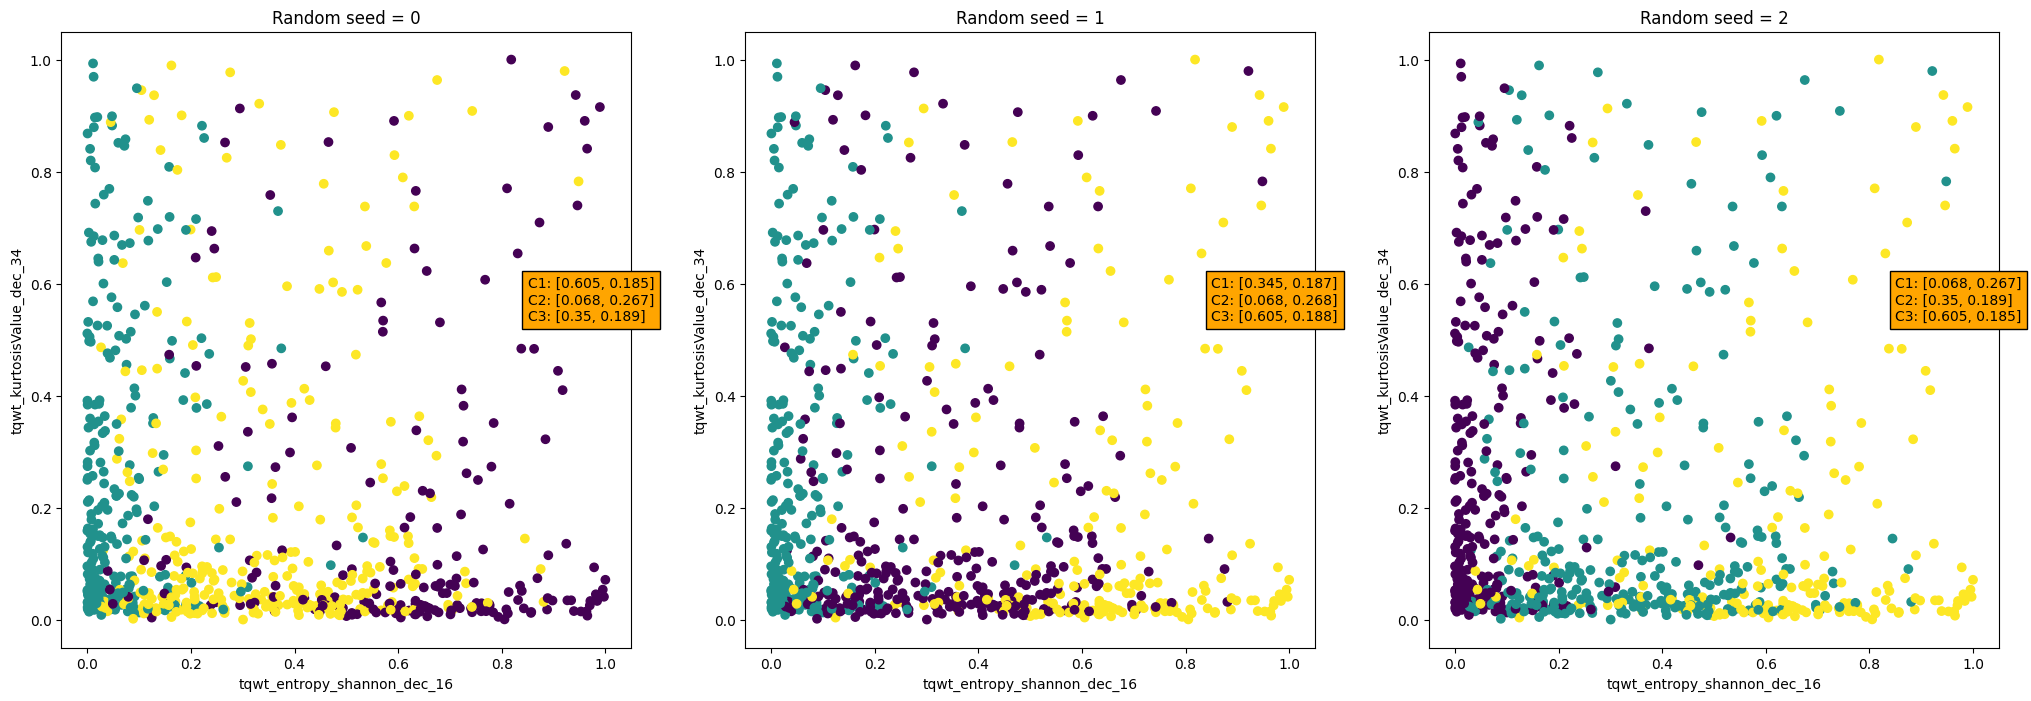

In [2]:

# Question 3

def get_highest_var(input_var, n):
    """Returns the indexes of the n highest variance variables of the
    input array 'input_var'."""
    
    # Get the variance of every variable.
    variance = np.var(input_var, axis = 0)

    res = []

    # Get index of the n highest variance variables.
    for i in range(0, n):
        max = variance.argmax(axis = 0)

        # Invalidates the entry we just got
        # so the indexes stay consistent.
        variance[max] = -2

        res.append(max)

    return res


# Get the two highest variance variables.
highest_vars = get_highest_var(X, 2)

# Plot multiple scatter plots.
fig, (ax1) = plt.subplots(1,3, figsize = (25, 8))

plot_titles = ["Random seed = 0", "Random seed = 1", "Random seed = 2"]

# Set the plot titles.
for col in range(0,3):
    ax1[col].set_title(plot_titles[col])


# Data used to analyze the plots:
x_data, y_data = highest_vars[0], highest_vars[1]

x, y = X[:, x_data], X[:, y_data]
x_col, y_col = X_init.columns[x_data], X_init.columns[y_data]

print(f"{x_col} (index {x_data}).")
print(f"{y_col} (index {y_data}).")

for col in range(0,3):
    ax1[col].scatter(x, y, c = cluster_points[col])
    ax1[col].set_xlabel(x_col)
    ax1[col].set_ylabel(y_col)

    c1_coords = "C1: " + str([np.round(cluster_centroids[col][0][x_data], 3), np.round(cluster_centroids[col][0][y_data], 3)])
    c2_coords = "C2: " + str([np.round(cluster_centroids[col][1][x_data], 3), np.round(cluster_centroids[col][1][y_data], 3)])
    c3_coords = "C3: " + str([np.round(cluster_centroids[col][2][x_data], 3), np.round(cluster_centroids[col][2][y_data], 3)]) 

    centroid_coords = c1_coords + "\n" + c2_coords + "\n" + c3_coords

    ax1[col].text(0.85, 0.535, centroid_coords, fontname = "Sans", 
                  bbox = dict(facecolor = "orange", alpha = 1))

    

4)	[1.5v] The fraction of variance explained by a principal component is the ratio between the variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues). How many principal components are necessary to explain more than 80% of variability?
Hint: explore the DimReduction notebook to be familiar with PCA in sklearn. 

---

In [8]:

# Question 4.
# Learn the transformation and fit the model to out data.
pca = PCA()
pca.fit(X)

# Get the explained variance ratio of each principal component.
explained_variance = np.array(pca.explained_variance_ratio_)

# Sort the array.
sorted_explained_variance = np.sort(explained_variance)

threshold = 0.8

# ---------------------------------------------------------------------- #

counter = 0
sum = 0

# Loop over the array until we hit the threshold.
for var in explained_variance:
    sum += var
    counter += 1

    if sum >= threshold:
        print(f"Not-sorted: explained variance of: {sum} - with {counter} PCs")
        break

counter = 0
sum = 0

# Loop over the array until we hit the threshold.
for var in sorted_explained_variance:
    sum += var
    counter += 1

    if sum >= threshold:
        print(f"Sorted: explained variance of: {sum} - with {counter} PCs")
        break


Not-sorted: explained variance of: 0.8006422402169663 - with 31 PCs
Sorted: explained variance of: 0.807413959323881 - with 751 PCs
